# Sub-Problem 3: Does textual data in the summary and sentiments of reviews affect price?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()


In [2]:
df=pd.read_csv('data/new_data.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### DATA CLEANING

In [3]:
df = df[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                        'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
df.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [4]:
new_df = df.fillna(0)


priceDF = new_df['price']


prices = []


for p in priceDF:
    p = float(p[1:].replace(',', ''))
    prices.append(p)


new_df['price'] = prices


new_df = new_df[new_df.price > 0]

new_df = new_df[new_df.bedrooms > 0]
new_df = new_df[new_df.bathrooms > 0]
new_df = new_df[new_df.accommodates > 0]
new_df = new_df[new_df.beds > 0]
new_df = new_df[new_df.review_scores_rating > 0]
new_df = new_df[new_df.reviews_per_month > 0]

new_df.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


### Analyzing summaries of the most expensive listings

In [21]:
summ_df=new_df[['summary','price']]  # top 100
summ_df=summ_df[pd.notnull(summ_df['summary'])]
summ_df=summ_df[summ_df['summary']!=0]
summ_df=summ_df.sort_values(by='price',ascending=False)
top100DF = summ_df.head(100)
top100DF.head()

,summary,price
3122,2 bedroom fully finished basement apartment wi...,1000.0
1208,100% Walk Score close to the Convention Center...,999.0
2,New modern house built in 2013. Spectacular s...,975.0
3443,Beautiful home that is located quiet neighborh...,950.0
1279,Fully updated by professional interior designe...,899.0


In [23]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string
import nltk
#nltk.download('wordnet')


words=''
for index,row in top100DF.iterrows():
    words+=row['summary']
    
string_punctuation=string.punctuation
ignoreChar=['\r', '\n', ' ', "'s"]
nums=['0','1','2','3','4','5','6','7','8','9']

summ_data=nltk.word_tokenize(words)
words_only=[l.lower() for l in summ_data if l not in string_punctuation if l not in ignoreChar if l not in nums]

filtered_data=[word for word in words_only if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]


'bedroom fully finished basement apartment separate'

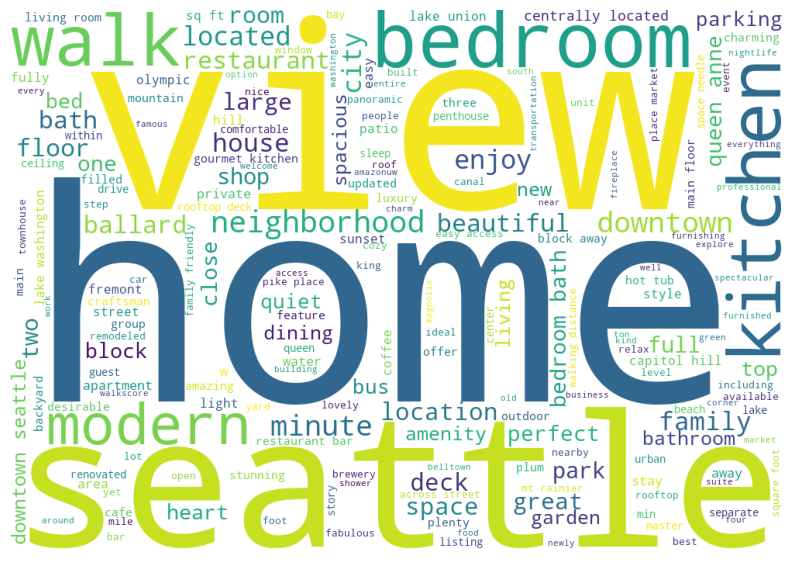

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


wordcloud=WordCloud(width=1000, height=700, background_color="white").generate(final_words)
plt.figure(figsize = (10,11))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the word cloud above, we can see that summaries of the most expensive listings all have particularly 3 words in common: 'seattle', 'home' & 'capitol hill'. Other words like: 'downtown seattle', 'house', 'enjoy', 'apartment' also commonly appear in those listings. But could it just be that all listings have these words in their summaries? To find out, lets also analyze the summaries of the cheapest listings and see if we can infer anything from that.

In [25]:
summaryDF=new_df[['summary','price']]    # 100 cheapest listing
summaryDF=summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF=summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[1])
bot100DF = summaryDF.head(100)
bot100DF.sample(n=5)

,summary,price
2889,I live in Capitol Hill. This is the Best locat...,29.0
1944,"Queen size bed, beautiful view,",38.0
2329,"This clean, quiet & cozy full bedroom shares a...",36.0
2338,"This clean, quiet & cozy queen bedroom shares ...",34.0
3286,A quiet place to rest while visiting family or...,39.0


In [26]:
words=''
for index,row in bot100DF.iterrows():
    words += row['summary']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'enjoy comfy pull-out bed capitol hill neighborhood'

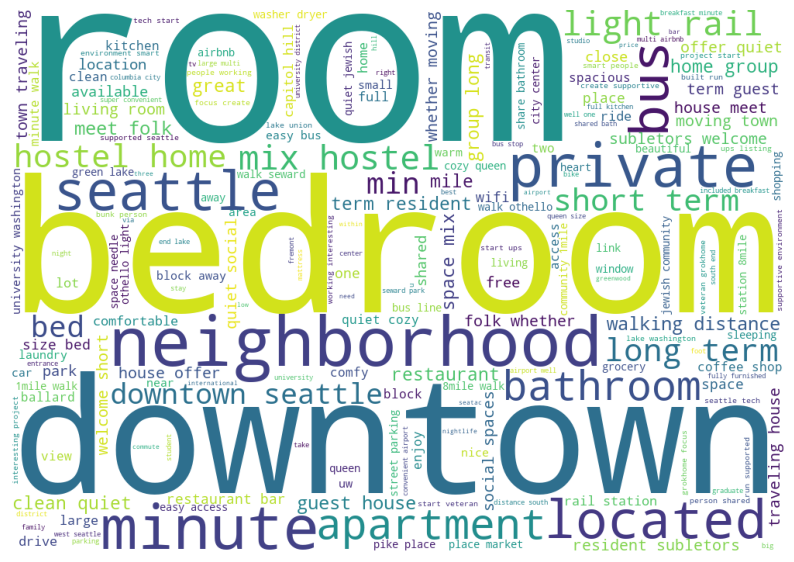

In [27]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()